In [113]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [114]:
# def L(x,y,p=2): # 默认为L_2(欧氏距离)
#     sum = 0
#     for i in range(len(x)):
#         sum += math.pow(abs(x[i] - y[i]),p)
#     return math.pow(sum, 1/p)
# # 上述函数等价于 np.linalg.norm(x-y,2)

python实现，遍历所有数据点，找出个距离最近的点的分类情况，少数服从多数

In [115]:
# 加载数据
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length','sepal width','petal length','petal width','label'] # 重命名colums

(Text(0.5, 0, 'sepal length'), Text(0, 0.5, 'sepal width'))

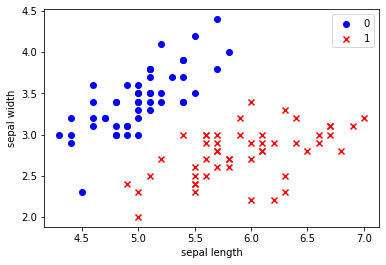

In [116]:
# 绘制数据
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],c='b',marker='o',label='0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],c='r',marker='x',label='1')
plt.legend()
plt.xlabel('sepal length'),plt.ylabel('sepal width')

In [117]:
# 分割数据
data = np.array(df.iloc[:100,[0,1,-1]])
X,y = data[:,:-1],data[:,-1]
# y = [1 if i == 1 else -1 for i in y]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 
# 若test_size∈(0,1):len(测试集)/len(总样本数目),如其为整数,则为测试集样本的数目
# 注意是随机划分样本，Amazing

### 定义KNN类
核心思想：
给定一个test点，找出与其距离最近的k个点，然后这k个点中点数最多的类别预测为该test点的类别
knn三要素：距离度量方法、k值、分类决策规则
1.距离度量方法：np.linalg.norm()求L2范数
2.k值：定为3（定为其他值好像影响不大）
3.分类决策规则：多数表决方法
注：由于计算test点和其他所有训练实例的距离比较耗时，可考虑kd树优化。（此处未定义）

In [118]:
class KNN:
    def __init__(self,X_train,y_train,k=3,p=2):
        # k邻近取k=3, 距离度量p=2
        self.k = k
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self,X): # X为待预测点
        # 以下两个for循环找到了训练集中各点距离点X最小的k个点
        knn_list = []
        for i in range(self.k):
            dist = np.linalg.norm(X-self.X_train[i], ord=self.p) #范数ord等于self.p
            knn_list.append((dist,self.y_train[i])) # 将距离和该样本的分类结果 组合成元组存入list

        for i in range(self.k,len(self.X_train)): #训练集中排除前k个之外的样本
            ''' 每次取出k个点列表中的最大距离的点 用剩下训练集中小于该距离的训练样本替换掉，
                 以期找到训练集中距离最近的k个样本'''
            max_index = knn_list.index(max(knn_list,key=lambda x: x[0])) 
            # index是取索引; key参数可用匿名函数控制取最大值的方式，此处为按第一位取最大值
            dist = np.linalg.norm(X-self.X_train[i], ord=self.p) #训练集k之外的距离
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist,self.y_train[i]) # 替换

        # 统计
        knn = [k[-1] for k in knn_list] # knn是k个集合的类别
        count_pairs = Counter(knn) # Counter是统计knn中各类别的个数
        # count_pairs.iterms()将字典转换为<class 'dict_items'> 第二维是value(各类别的次数)
        max_count = sorted(count_pairs.items(),key=lambda x:x[-1])[-1] # 得到类别样本数最多的dict
        max_count_label = max_count[0] # 得到类别
        return max_count_label
        
    def score(self,X_test,y_test):
        right_count = 0
        n = 10
        for X,y in zip(X_test,y_test):
            pre_label = self.predict(X)
            if pre_label == y:
                right_count+=1
        return right_count/len(X_test) # 返回正确率           

In [119]:
#clf - classifier 分类器
clf = KNN(X_train,y_train) # 创建对象
print( f"正确率为：{clf.score(X_test,y_test)*100} %") 

正确率为：100.0 %


In [120]:
test_point = np.array([[6.0,3.0],[5.7,2.4],[4.8,2.8]])
for point in test_point:
    print(f'Test Point: {clf.predict(point)}')

Test Point: 1.0
Test Point: 1.0
Test Point: 0.0


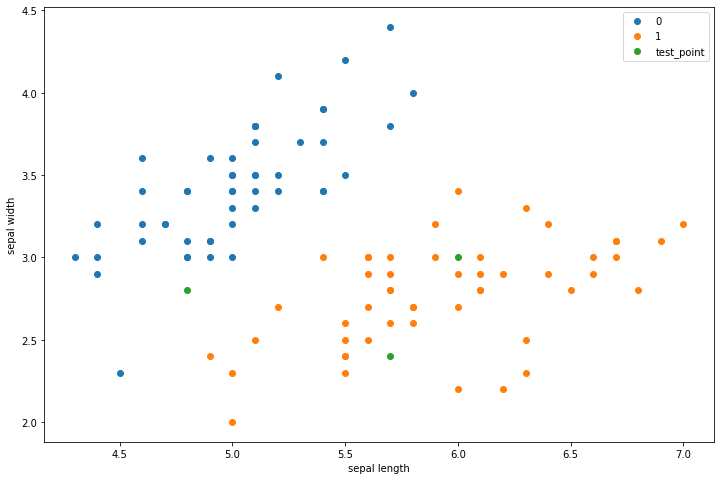

In [121]:
# 观察一下自定的三个点的区域
plt.figure(figsize=(12,8))
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.scatter(test_point[:,0], test_point[:,-1], label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## scikit-learn方法

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
clf_sk = KNeighborsClassifier(n_neighbors=3,p=2,algorithm='kd_tree')
"""
n_neighbors: 临近点个数
p: 距离度量
algorithm: 近邻算法，可选{'auto', 'ball_tree', 'kd_tree', 'brute'}
weights: 确定近邻的权重"""
clf_sk.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

In [124]:
clf_sk.score(X_test,y_test) #测试准确度

1.0